<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800">

# Основы глубинного обучения: домашнее задание 4
</center>

**ФИО:**

**Забавный факт о себе:**

## Общая информация

__Дата выдачи:__ 09.12.2023

__Дедлайн:__ 23:59MSK 18.12.2023

В случае этой домашки мягкий дедлан совпадает с жёстким.

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5.2 балла (3 основных балла и ещё 2.2 бонусных).

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# Описание данных

Данные можно [скачать с гугл-диска.](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing) Если вы делаете задание в колабе, то строчки ниже сами скачают вам данные.



In [4]:
# import gdown

# url = "https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing"
# # gdown.download_folder(url, quiet=True, use_cookies=False)
# gdown.download_folder(url, quiet=False)

В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [5]:
df_ria = pd.read_csv('/content/drive/MyDrive/ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


,href,date,time,title,snippet,text,category,tags,shows
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"Биньямин Нетаньяху, Израиль, В мире",728.0
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"Эммануэль Макрон, Франция, В мире",3086.0
2,/20181231/1548961337.html,2018-12-31,"31 декабря 2018, 23:12",Аарон Рэмзи проведет переговоры с пятью топ-кл...,"Полузащитник лондонского ""Арсенала"" Аарон Рэмз...","МОСКВА, 31 дек - РИА Новости. Полузащитник лон...",NaN,ФК Арсенал (Лондон),183.0
3,/20181231/1548961304.html,2018-12-31,"31 декабря 2018, 23:09",Гол Азмуна принес сборной Ирана победу над кат...,Футболисты сборной Ирана одержали победу над к...,"МОСКВА, 31 дек - РИА Новости. Футболисты сборн...",NaN,"Сердар Азмун, Сборная Ирана по футболу",78.0
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,Теннис,79.0


Многие новостные агенства поддерживают странички в социальных сетях. Они постят туда самые сочные сюжеты. В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [6]:
df_vk = pd.read_csv('/content/drive/MyDrive/vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text']
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head(20)

(19928, 7)


,id,href,datetime,title,likes,comments,snippet
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN
5,24005669,/20190201/1550256715.html,2019-02-01 20:43:42,Жительница Белгорода перевела мошенникам 43 ми...,79,155,NaN
6,24005531,/20190201/1550266666.html,2019-02-01 20:20:22,"В Подмосковье врачи спасли руку пациента, пере...",155,47,NaN
7,24005400,/20190201/1550280682.html,2019-02-01 19:53:43,Трамп хочет заключить новый договор на смену Д...,45,72,NaN
8,24005074,/20190201/1550257362.html,2019-02-01 19:02:05,Лукашенко поручил убрать из школьных программ ...,144,151,NaN
9,24004899,https://rsport.ria.ru/20190201/1550277848.html,2019-02-01 18:35:07,Сборная России вышла в финал чемпионата мира п...,407,55,NaN


В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [7]:
df_comments = pd.read_csv('/content/drive/MyDrive/vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

<ipython-input-7-6e01acb96ada>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/content/drive/MyDrive/vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


# А что надо сделать то?

В тетрадке вам предстоит сделать следующие шаги:

1. Вы обучите нейросеть предсказывать категорию новости
2. Вы построите предсказания для тех новостей, где мы ничего не знаем о категории
3. Вы используете уже обученный для сентимент-анализа классификатор из библиотеки `hugging face` чтобы предсказать эмоциональную окраску каждого комментария
4. Вы проведёте аналитику по новостям, а именно построите топы из самых позитивных и негативных категорий и новостей

Для первого шага вам будет дан бэйзлайн. Если вы его прогоните, у вас получится базовая модель, которая даст некоторое качество решения задачи. Вам надо будет выяснить, насколько это качество оказалось хорошим, а затем внести в код некоторые улучшения.



## Часть 1: категоризация новостей (1.2 + 2 бонусных балла)

Каждой новости в соотвествие поставлены ключевые слова. Будем считать, что эти ключевые слова — тематики новости. Нужно научиться предсказывать тематики по тексту новости. Готовые тематики у нас есть только по новостям с сайта. Они за 2018 год. По новостям из ВКонтакте у нас тематик нет. Мы собираемся их предсказать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Странно будет обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях. Мы не будем так делать. Мы попробуем обучить базовый вариант нейронной сети только на заголовках новостей. Все, кто захочет получить бонусные баллы, смогут попробовать добавить в нейросеть сниппеты (так назыают короткие описания новостей).

## 1.1 Подготовка таргета

Поработаем с таргетом. Мы будем предсказывать переменную `tags`. Давайте выясним скоько уникальных тегов существует.

In [8]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in  w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(','))

print(len(tags_cnt))
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

Всего в выборке есть порядка 13 000 тэгов. Многие встречаются всего по разу. Давайте оставим в выборке только те тэги, которые встречаются более 30 раз.

In [9]:
target_tags = {tag for tag,cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [10]:
tag2idx = dict(zip(target_tags, range(len(target_tags))))
idx2tag = {jtem: item for item,jtem in tag2idx.items()}

Почистим таргет от лишних тэгов.

In [11]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in  w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [12]:
df_ria.target_tags.values[:3]

array([list([962, 1475, 905]), list([83, 1076, 905]), list([677])],
      dtype=object)

## 1.2 Подготовка текстов

Теперь займёмся предобработкой текстов. Приведём все слова к маленькому регистру и выбросим мусорные символы. В качестве токенов будем рассматривать отдельные слова.

Напомню, что мы пока что решили работать только с названиями статей. Поэтому вся предобработка применяется исключительно к ним. **Спойлер:** предобработку для сниппетов вы сделаете сами в первом же задании.

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import re
from nltk.tokenize import word_tokenize

def normalise_text(text):
    text = text.lower()

    # сурово регулярками выкидываем мусорные символы
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values)))
len(word_cnt)

112178

In [15]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

Давайте почистим словарь от стоп-слов и подготовим его к использованию внутри датасета. Мы будем с помощью словаря заменять слова на индексы. Добавим в словарь несколько специальных токенов для неизвестных слов и паддингов.

In [16]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [17]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
}

k = 2
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k
        k += 1

In [18]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [19]:
def create_vocab(text, stops_ru=stops_ru):

    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

__[0.2 балла] Задание 1:__

- Cделайте аналогичную предобработку титулов из таблички `df_vk`. Запишите получившийся результат в столбец `title_clean` по аналогии с таблицей `df_ria`.
- Сделайте для обеих таблиц предобработку колонок со сниппетами `snippet` и запишите получившийся результат в столбец `snippet_clean`. Все пропуски заполните токеном `"#UNKN"`.

In [20]:
df_vk.snippet.isna().sum()

13403

In [21]:
def func_na_str(cell):
    if pd.isna(cell):
        return '#UNK#'
    else:
        return normalise_text(cell)

In [22]:
df_vk['title_clean'] = df_vk.title.apply(normalise_text)
df_vk['snippet_clean'] = df_vk.snippet.apply(func_na_str)
df_ria['snippet_clean'] = df_ria.snippet.apply(func_na_str)

## 1.3 Поставка данных

Пересечение сайта и ВК по опубликованным новостям довольно маленькое. Мы обучаем модель на данных с сайта. Предсказания мы будем строить на данных из ВК. У этих данных разная природа. В ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК.

Давайте сохраним пересечение в отдельную табличку, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [23]:
ria_hrefs = set(df_ria.href.values)
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs)

print('Размер отложенной выборки:', len(test_hrefs))

df = df_ria[~df_ria.href.isin(test_hrefs)]

Размер отложенной выборки: 1128


По странному совпадению (я правда не знаю почему) пересечение лежит в декабре. Мы будем его использовать как тестовую выборку.

In [24]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max()

('2018-12-06', '2018-12-31')

Предположим, что мы делим выборку на обучающую и тестовую случайно. За один и тот же промежуток времени может выйти довольно большое число новостей с одинаковым заголовком. Давайте представим себе, что в тесте и трэйне есть много статей про одно и то же событие. Модель научилась на обучающей выборке хорошо его тегировать. Остальные события модель тегирует намного хуже. Метрики на тестовой выборке высокие. В следующем месяце СМИ перестают освещать это событие, в потоке новостей совершенно другие новости. Качество модели резко проседает.

Чтобы не напороться на завышенные метрики, обычно выборку дробят на обучающую и тестовую по времени. Тогда статьи из теста будут имитировать поток новых новостей, освещающих новые события.

In [25]:
df.date.min(), df.date.max()

('2018-03-15', '2018-12-31')

__[0.2 балла] Задание 2:__ Разбейте выборку на обучающую, валидационную и тестовую. В тест возьмите весь декабрь. В валидацию октябрь и ноябрь.

In [26]:
df.shape

(200309, 12)

In [27]:
# your code here
# ♡ (´｡• ω •｡`)

df_test = df[df["date"]>= '2018-12-01']
df_val = df[(df['date'] >= '2018-10-01') & (df['date'] < '2018-12-01')]
df_train = df[df['date'] < '2018-10-01']

Сформируем отложенную выборку (пересечение ВКонтакте и РИА).

In [28]:
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

,href,title_clean,target_tags
0,/20181206/1547493936.html,эксперты определили самые бюджетные экзотическ...,"[343, 1152]"
1,/20181206/1547516457.html,рада приняла закон расширяющий контролируемую ...,"[829, 905]"
2,/20181206/1547520788.html,россия оказалась родиной древнейших титанозавр...,"[1515, 1417]"
3,/20181206/1547521406.html,школа в красноярске превратилась в хогвартс из...,[588]
4,/20181206/1547522342.html,рада решила не продлевать договор о дружбе и с...,"[40, 905]"


Напишем датасет для поставки данных в нейросеть.


In [29]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        return (self.X_title[idx, :], self.y[idx])


__[0.2 балла] Задание 3:__ Сейчас датасет умеет работать только с полем `title_clean`. Давайте сделаем этот датасет более многофукнциональным и добавим в него возможность добавить в обработку данных сниппет.

1. Внутри датасета `snippet` надо обработать точно также как и `title`.
2. Если `snippet=None`, датасет должен вернуть два объекта: `X_title, y`. В обратном случае датасет должен вернуть три объекта.

**Важно:** Весь код ниже работает сейчас без сниппета. Он не должен развалиться от того, что сниппет в нём нигде не указан.

In [30]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

        self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
        self.max_classes = max_classes
        self.y=self.target_ohe(target)
        self.X_title = self.create_text(title, max_title_len)
        self.X_snippet = self.create_text(snippet,max_snippet_len) if snippet is not None else None

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        if self.X_snippet is not None:
            return (self.X_title[idx, :],self.X_snippet[idx, :], self.y[idx])
        return (self.X_title[idx, :], self.y[idx])


Объявим датасеты, оставим в словаре 30 000 самых частотных слов. Будем смотреть на титулы максимальной длины 20.

In [31]:

CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
# test_dataset_wo_snippet = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

In [32]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## 1.4 Архитектуры

Соберём базовую архитектуру для обучения.

In [33]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

Соберём в `pytorch_lightning` модуль для обучения нейронки.

In [34]:
!pip3 install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 64.6 MB/s eta 0:00:00


In [35]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True,on_step=False, on_epoch=True, logger=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True,on_step=False, on_epoch=True, logger=True
        )
        return loss

Обучим модель.

In [36]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [37]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [38]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger

def experiment(module,train_dataloader,val_dataloader,epochs = 5):
    wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
    checkpoint_callback = ModelCheckpoint(monitor="val_loss", mode="min")
    wandb.init(project='hw_iad_dl4')
    trainer = pl.Trainer(
    logger=wandb_logger,
    accelerator = 'auto',
    max_epochs=epochs,
    callbacks=[checkpoint_callback]
    )
    trainer.fit(module,train_dataloader,val_dataloader)
    wandb.finish()

In [39]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline_wo_snippet = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module =TrainLightningModule(model_baseline_wo_snippet, LR, criterion)
experiment(train_module,train_dataloader,val_dataloader,EPOCHS)
# trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS)
# trainer.fit(train_module, train_dataloader, val_dataloader)

wandb: Currently logged in as: metobtw. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | SimpleClassifier | 3.5 M 
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
3.5 M     Trainable params
0         Non-trainable par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


epoch,▁▁▃▃▅▅▆▆██
train_loss,█▄▃▂▁
trainer/global_step,▁▁▃▃▅▅▆▆██
val_loss,█▄▂▁▁
epoch,4
train_loss,8.0764
trainer/global_step,10694
val_loss,10.73741


__[0.2 балла] Задание 4:__  Модель выше работает только с титулом.

- Залоггируйте её обучение на [WandB](https://wandb.ai/).
- Соберите архитектуру, которая будет принимать на вход не только титул, но ещё и сниппет. В этой архитектуре должно происходить следующее:

1. Общий слой `nn.Embedding` применяется к сниппету и титулу параллельно.
2. Происходит усреднее по текстам.
3. Вектора конкатятся в один длины 600
4. Линейный слой делает классификацию

Обучите эту модель. Сравните траектории обучения на WandB. Прикрепите ссылку на дашборд либо скришот к тетрадке.

Даталоадеры придётся объявить заново с учётом сниппетов. Правда ли, что она бьёт на валидационной выборке модель, обученную только на титулах статей?

In [40]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(2 * embedding_dim, output_dim) # vector 600 thats why *2

    def forward(self, title, snippet):
        embedded_title = self.embedding(title)
        embedded_title = embedded_title.mean(dim=1)
        embedded_snippet = self.embedding(snippet)
        embedded_snippet = embedded_snippet.mean(dim=1)
        embedded = torch.concat((embedded_title,embedded_snippet),dim=1)
        return self.fc(embedded)

In [41]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20
MAX_SNIPPET_LEN = 20
# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,df_train.snippet_clean.values, MAX_SNIPPET_LEN)
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,df_val.snippet_clean.values, MAX_SNIPPET_LEN )
#test_dataset_snippet = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,df_test.snippet_clean.values, MAX_SNIPPET_LEN )

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=4)

In [42]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title,snippet):
        result = self.model(title,snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title,snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True,on_step=False, on_epoch=True, logger=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title,snippet,target = val_batch
        logits = self.model(title,snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True,on_step=False, on_epoch=True, logger=True
        )
        return loss

In [43]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline_snippet = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module =TrainLightningModule(model_baseline_snippet, LR, criterion)
experiment(train_module,train_dataloader,val_dataloader,EPOCHS)
# trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS)
# trainer.fit(train_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | SimpleClassifier | 4.0 M 
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
15.806    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


epoch,▁▁▃▃▅▅▆▆██
train_loss,█▄▂▁▁
trainer/global_step,▁▁▃▃▅▅▆▆██
val_loss,█▄▂▁▁
epoch,4
train_loss,6.86232
trainer/global_step,10694
val_loss,10.4886


### https://wandb.ai/metobtw/hw_iad_dl4?workspace=user-metobtw

## 1.5 Инференс и оценка качества моделей

Для каждой новости нам надо предсказывать несколько тэгов. То есть в нашем случае настоящее значение таргета это множество из тэгов $y_i = [tag1, tag2, tag3]$. Прогноз модели также множество из тэгов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом (под $|A|$ имеется в виду мощность множества, то есть число элементов в нём):

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, так как у нас в выборке огромное число нулей и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [44]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def exact_match(target, y_pred):
    return (1.*(y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [45]:
test_dataset_snippet = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,df_test.snippet_clean.values, MAX_SNIPPET_LEN )
test_dataloader = DataLoader(test_dataset_snippet, shuffle=False, batch_size=test_dataset_snippet.__len__())

for title,snippet, target in test_dataloader:
    logit = model_baseline_snippet(title,snippet)
    pred_prob = F.softmax(logit, dim=1)

assert pred_prob.shape[0] == test_dataset_snippet.__len__()

Теперь выбирая различное значение порога, мы можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, так как во многих документах никакого прогноза не будет построено вообще.

In [46]:
TRESHOLD = 0.01
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.995406448841095
Precision: 0.294331431388855
Recall: 0.7716377973556519


In [47]:
TRESHOLD = 0.05
y_pred = 1*(pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9982863664627075
Precision: 0.5215263962745667
Recall: 0.6131001114845276


In [48]:
TRESHOLD = 0.9
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.998321533203125
Precision: 0.01199432834982872
Recall: 0.01042813342064619


In [49]:
test_dataloader = pred_prob = test_dataset_snippet = []

Дальше мы будем строить довольно много прогнозов. Давайте напишем код для их строительства в виде функции. Обратите внимание, что на модели со снипетом она упадёт. Когда вы доберётесь до строительства прогнозов, функцию придётся немного модернизировать.

In [50]:
def get_predict(model, dataloader, is_snippet = 0):
    pred_prob = []
    if is_snippet:
        for title,snippet, target in dataloader:
            logit = model(title,snippet)
            pred_prob = F.softmax(logit, dim=1)
    else:
        for title, target in dataloader:
            logit = model(title)
            pred_prob = F.softmax(logit, dim=1)
    return pred_prob,target

__[0.2 балла] Задание 5:__ Какая метрика для нас в этой задаче важнее? Точность или полнота? Почему?

__ваш ответ:__ точность важнее, т.к. можно недоразметить новость на теги, но лучше бы если бы они были правильные

- Напишите функцию, которая будет подбирать оптимальное значение порога, оптимизирующее выбранную вами метрику.
- Подберите значение порога на валидационной выборке.
- Сравните модель со сниппетами и без сниппетов, используя выбранную вами метрику при оптимальном значении порога на тестовой выборке.
- Какая из них оказалась лучше?

In [51]:
def find_thres(target,pred):
    ma_prec,threshold = 0,0
    for i in range(100):
        y_pred = 1*(pred > i/100)
        prec = precision(target, y_pred)
        if prec > ma_prec:
            ma_prec = prec
            threshold = i
    return threshold

валидация

In [52]:
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
dataloader = DataLoader(val_dataset, shuffle=False, batch_size=val_dataset.__len__())
y_pred,target = get_predict(model_baseline_wo_snippet,dataloader)

In [53]:
threshold_best_wo_snippet = find_thres(target,y_pred)
TRESHOLD = threshold_best_wo_snippet/100
y_pred = 1*(y_pred > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9986803531646729
Precision: 0.7233152985572815
Recall: 0.5034463405609131


In [54]:
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,df_val.snippet_clean.values, MAX_SNIPPET_LEN )
dataloader = DataLoader(val_dataset, shuffle=False, batch_size=val_dataset.__len__())
y_pred,target = get_predict(model_baseline_snippet,dataloader,1)

In [55]:
threshold_best_snippet = find_thres(target,y_pred)
TRESHOLD = threshold_best_snippet/100
y_pred = 1*(y_pred > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9987066388130188
Precision: 0.7465347647666931
Recall: 0.5264478325843811


тестовая

In [56]:
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())
y_pred,target = get_predict(model_baseline_wo_snippet,dataloader)

In [57]:
TRESHOLD = threshold_best_wo_snippet/100
y_pred = 1*(y_pred > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9986048936843872
Precision: 0.5799123644828796
Recall: 0.45376813411712646


In [58]:
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,df_test.snippet_clean.values, MAX_SNIPPET_LEN )
dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())
y_pred,target = get_predict(model_baseline_snippet,dataloader,1)

In [59]:
TRESHOLD = threshold_best_snippet/100
y_pred = 1*(y_pred > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9985718727111816
Precision: 0.5854750275611877
Recall: 0.46153759956359863


Модель со сниппетам показала себя лучше по точности

__[0.2 балла] Задание 6:__  Постройте прогнозы для отложенной выборки, которая представляет из себя пересечение сайта РИА-новостей и ВКонтакте. Проседает ли на ней качество модели? Насколько сильно?

In [60]:
df_oob.head()

,href,title_clean,target_tags
0,/20181206/1547493936.html,эксперты определили самые бюджетные экзотическ...,"[343, 1152]"
1,/20181206/1547516457.html,рада приняла закон расширяющий контролируемую ...,"[829, 905]"
2,/20181206/1547520788.html,россия оказалась родиной древнейших титанозавр...,"[1515, 1417]"
3,/20181206/1547521406.html,школа в красноярске превратилась в хогвартс из...,[588]
4,/20181206/1547522342.html,рада решила не продлевать договор о дружбе и с...,"[40, 905]"


In [61]:
test_dataset = NewsDataset(df_oob.target_tags.values, df_oob.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())
y_pred,target = get_predict(model_baseline_wo_snippet,dataloader)

In [62]:
TRESHOLD = threshold_best_wo_snippet/100
y_pred = 1*(y_pred > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.998592734336853
Precision: 0.5500847101211548
Recall: 0.4123765230178833


Точность просела на 5%  и на 3% полнота

## 1.6 Бонусное задание

Давайте модернизируем наши архитектуры настолько, насколько это возможно.

__[0.5 балла]__ Попробуйте собрать более большую архитектуру. Например, сразу после слоя эмбеддингов вы можете попробовать добавить свёрточные слои (`Conv1D` свёртки). Поиграйте с оптимизатором и тп.

Опишите результаты своих экспериментов ниже. Расскажите, что конкретно вы делали и удалось ли вам улучшить качество модели. Все траектории обучения залоггируйте на WandB.   

__Ваш лог экспериментов:__

-
-
-

In [63]:
# your code here
# (⊙_⊙)

__[0.5]__ Скачайте с сайта [Rusvectores](https://rusvectores.org/ru/models/) любые новостные word2vec эмбединги. Возьмите из модели эмбеддинги для всех слов, которые встречаются вв вашем словаре и добавьте их в модель первым слоем. Заморозьте этот слой и не обновляйте в нём веса. Если у вас в словаре есть слово, но его нет среди предобученных эмбеддингов, замените его на токен `#UNKN`.

__Ваш лог экспериментов:__

-
-
-

In [64]:
# your code here
# =^･ｪ･^=

__[1 балл]__ Зафайнтьюньте трансформер для решения задачи с помощью библиотеки `hugging face`. Выбор предобученной модели кратко обоснуйте.

__Ваш лог экспериментов:__

-
-
-

In [65]:
# your code here
# ٩(ˊ〇ˋ*)و


Сравните все обученные модели между собой на тестовой выборке.

In [66]:
# your code here
# (⌐■_■)

## Часть 2: предсказание категорий (0.3 балла)

Возьмите датасет `df_vk` и для всех новостей из него предскажите категории с помощью лучшей, получившейся у вас модели.

In [67]:
df_vk['target_tags'] = [[0]]*df_vk.shape[0]
df_vk

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNK#,[0]
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNK#,[0]
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNK#,[0]
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNK#,[0]
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNK#,[0]
...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNK#,[0]
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNK#,[0]
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNK#,[0]
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNK#,[0]


In [68]:
test_dataset = NewsDataset(df_vk.target_tags.values, df_vk.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,df_vk.snippet_clean.values, MAX_SNIPPET_LEN )
dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())
y_pred = []
for title,snippet,target in dataloader:
    y_pred = model_baseline_snippet(title,snippet)
    pred_prob = F.softmax(y_pred, dim=1)


In [69]:
TRESHOLD = threshold_best_snippet/100
y_pred = 1*(pred_prob > TRESHOLD)

In [70]:
df_vk['tags_names'] = [[0]]*df_vk.shape[0]
df_vk

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,tags_names
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNK#,[0],[0]
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNK#,[0],[0]
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNK#,[0],[0]
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNK#,[0],[0]
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNK#,[0],[0]
...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNK#,[0],[0]
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNK#,[0],[0]
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNK#,[0],[0]
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNK#,[0],[0]


На всякий случай сохраните табличку с получившимися у вас предсказаниями. Мало ли, вы не доделаете последнее задание, а потом захотите вернуться к нему. Не прогонять же обучение нейросети и инференс по второму кругу...

In [71]:
for index, y_pred_value in enumerate(y_pred):
    # Ищем индексы элементов, равных 1, в текущем вложенном массиве
    positions = np.where(np.array(y_pred_value) == 1)[0].tolist()

    # Обновляем соответствующий элемент в target_tags
    df_vk.at[index, 'target_tags'] = positions
    df_vk.at[index, 'tags_names'] = [idx2tag[i] for i in positions]

In [72]:
df_vk

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,tags_names
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNK#,"[873, 905]","[украина, в мире]"
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNK#,[],[]
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNK#,[178],[сша]
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNK#,[178],[сша]
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNK#,[873],[украина]
...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNK#,[33],[россия]
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNK#,"[33, 164]","[россия, сергей лавров]"
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNK#,[178],[сша]
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNK#,[178],[сша]


## Часть 3: сентимент-классификатор (0.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [73]:
df_comments.head()

,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели? Сергей
2. Как выглядит архитектура модели? Насколько модель большая? BERT 29.2 млн параметров
3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК? На датесете новостей\ревьЮ, адекватно, т.к. тематика комментариев - новостные посты

Установим библиотеку. 🤗🤗🤗

In [ ]:
!pip3 install transformers

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [ ]:
from transformers import pipeline
model = pipeline(model="seara/rubert-tiny2-russian-sentiment",device='cuda')

Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

In [74]:
df_comments['sentiment_verdict'] = [0]*df_comments.shape[0]
df_comments['sentiment_score'] = [0]*df_comments.shape[0]

In [75]:
df_comments['text'].fillna(' ', inplace=True)
df_comments[:30]

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,0,0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,0,0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,0,0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,0,0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,0,0
5,24006379.0,24006362.0,2019-02-01 23:18:00,"[id109937745|Илья], Донецкая Народная Республи...",3.0,0,0
6,24006380.0,24006362.0,2019-02-01 23:18:44,"[id89551382|Юрий], это где?",2.0,0,0
7,24006381.0,24006362.0,2019-02-01 23:18:55,"[id109937745|Илья], Донецкая Народная Республика.",1.0,0,0
8,24006383.0,24006362.0,2019-02-01 23:20:00,"[id483059794|Марк], Донецк российский отделилс...",0.0,0,0
9,24006384.0,24006362.0,2019-02-01 23:20:22,"[id109937745|Илья], на планете Земля.",0.0,0,0


In [ ]:
from tqdm import tqdm
for index,_ in tqdm(df_comments.iterrows()):
    # Ищем индексы элементов, равных 1, в текущем вложенном массиве
    text = df_comments.at[index, 'text'][:2048] # ограничение на длину токена
    res = model(text)
    df_comments.at[index, 'sentiment_verdict'] = res[0]['label']
    df_comments.at[index, 'sentiment_score'] = res[0]['score']

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
161565it [11:51, 250.79it/s]

In [76]:
result = pd.read_csv("/content/drive/MyDrive/out.csv")
new_idx = 0
for index,_ in df_comments.iterrows():
    # Ищем индексы элементов, равных 1, в текущем вложенном массиве
    df_comments.at[index, 'sentiment_verdict'] = result.at[new_idx, 'label']
    df_comments.at[index, 'sentiment_score'] = result.at[new_idx, 'score']
    new_idx += 1

In [77]:
df_comments

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223
...,...,...,...,...,...,...,...
2704580,17991829,17976037.0,2017-09-30 10:27:11,"Сергей, я про простых американцев, которые слу...",0.0,neutral,0.649754
2704581,17992004,17976037.0,2017-09-30 10:49:21,"[id415883695|Евгений], у них довольствие и они...",0.0,negative,0.697936
2704582,17992058,17976037.0,2017-09-30 10:56:29,"[id142882974|Сергей], ну Кадафи и Хусейныча он...",0.0,negative,0.623313
2704583,17992487,17976037.0,2017-09-30 11:56:03,"[id142882974|Сергей], для этого существует физ...",0.0,neutral,0.873600


## Часть 4: аналитика (1 балл + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.2 балла]__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [78]:
df_comments["sentiment_verdict"].value_counts(normalize=True) * 100 # в процентах

neutral     69.919954
negative    22.879865
positive     7.200180
Name: sentiment_verdict, dtype: float64

In [79]:
sorted_df = df_comments[df_comments['sentiment_verdict'] == 'positive'].sort_values(by='sentiment_score', ascending=False)
pd.set_option('display.max_colwidth', None)
sorted_df.head(50)

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
508965,23095070,23094261.0,2018-11-17 11:21:56,"Отлично, молодец!Поздравляю!✨💫🌟💥",0.0,positive,0.996725
1424111,21323499,21322970.0,2018-06-20 18:54:40,Отлично! Просто отлично! Молодцы! Поздравляю от души! Горжусь!,3.0,positive,0.996674
2434524,18718201,18718179.0,2017-11-30 13:22:42,"отлично,молодцы!!!👍 респект",3.0,positive,0.996605
2128990,19643844,19640879.0,2018-02-16 08:33:19,Отлично! \nПоздравляем!!!,1.0,positive,0.996536
2146325,19591344,19588477.0,2018-02-12 08:25:08,"Отлично,я рад.",0.0,positive,0.996462
243929,23585686.0,23584622.0,2018-12-29 11:48:39,"Отлично,молодцы",2.0,positive,0.996461
1342337,21515168,21514312.0,2018-07-06 15:22:04,"Отлично,люблю ездить в Эмираты",0.0,positive,0.996450
296711,23487341,23487299.0,2018-12-20 12:34:50,Отлично! Здоровья всем желаю!,8.0,positive,0.996444
423821,23248899,23242108.0,2018-11-30 07:31:37,Я очень счастлива! Поздравляю!,0.0,positive,0.996431
1737559,20633834,20633609.0,2018-04-25 10:13:42,"Отлично, просто отлично!",0.0,positive,0.996418


__[0.2 балла]__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [81]:
df_vk

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,tags_names
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причастных к серии терактов",15,28,NaN,в днр заявили о задержании диверсантов причастных к серии терактов,#UNK#,"[873, 905]","[украина, в мире]"
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия сотовой компанией 200 рублей",32,42,NaN,житель урала заминировал тц изза снятия сотовой компанией 200 рублей,#UNK#,[],[]
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNK#,[178],[сша]
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрису Ирину Усок,58,35,NaN,в сша освободили задержанную российскую актрису ирину усок,#UNK#,[178],[сша]
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,"Толкнувший Скабееву депутат Рады заявил о грозящей ему ""опасности""",45,145,NaN,толкнувший скабееву депутат рады заявил о грозящей ему опасности,#UNK#,[873],[украина]
...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грозит отставка",141,114,NaN,политологи назвали губернаторов которым грозит отставка,#UNK#,[33],[россия]
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Лавров в резиденции Путина",140,50,NaN,захарова рассказала какую книгу подписывал лавров в резиденции путина,#UNK#,"[33, 164]","[россия, сергей лавров]"
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,"Современные люди появились более 300 тысяч лет назад, заявляют ученые",202,69,NaN,современные люди появились более 300 тысяч лет назад заявляют ученые,#UNK#,[178],[сша]
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNK#,[178],[сша]


In [86]:
sentiment_counts = df_comments.groupby('post_id')['sentiment_verdict'].value_counts().unstack(fill_value=0)
sentiment_counts.columns = ['negative_count', 'positive_count','neutral_count']
df_vk_with_counts = pd.merge(df_vk, sentiment_counts, left_on='id', right_index=True, how='left')
df_vk_with_counts

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,tags_names,negative_count,positive_count,neutral_count
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причастных к серии терактов",15,28,NaN,в днр заявили о задержании диверсантов причастных к серии терактов,#UNK#,"[873, 905]","[украина, в мире]",10.0,35.0,2.0
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия сотовой компанией 200 рублей",32,42,NaN,житель урала заминировал тц изза снятия сотовой компанией 200 рублей,#UNK#,[],[],11.0,28.0,3.0
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNK#,[178],[сша],4.0,15.0,3.0
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрису Ирину Усок,58,35,NaN,в сша освободили задержанную российскую актрису ирину усок,#UNK#,[178],[сша],10.0,28.0,2.0
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,"Толкнувший Скабееву депутат Рады заявил о грозящей ему ""опасности""",45,145,NaN,толкнувший скабееву депутат рады заявил о грозящей ему опасности,#UNK#,[873],[украина],37.0,93.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грозит отставка",141,114,NaN,политологи назвали губернаторов которым грозит отставка,#UNK#,[33],[россия],31.0,77.0,4.0
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Лавров в резиденции Путина",140,50,NaN,захарова рассказала какую книгу подписывал лавров в резиденции путина,#UNK#,"[33, 164]","[россия, сергей лавров]",11.0,29.0,8.0
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,"Современные люди появились более 300 тысяч лет назад, заявляют ученые",202,69,NaN,современные люди появились более 300 тысяч лет назад заявляют ученые,#UNK#,[178],[сша],11.0,56.0,0.0
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNK#,[178],[сша],10.0,40.0,1.0


__[0.2 балл]__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

<ipython-input-93-48fcbcf78343>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_vk_with_counts.groupby('like_bins').mean()


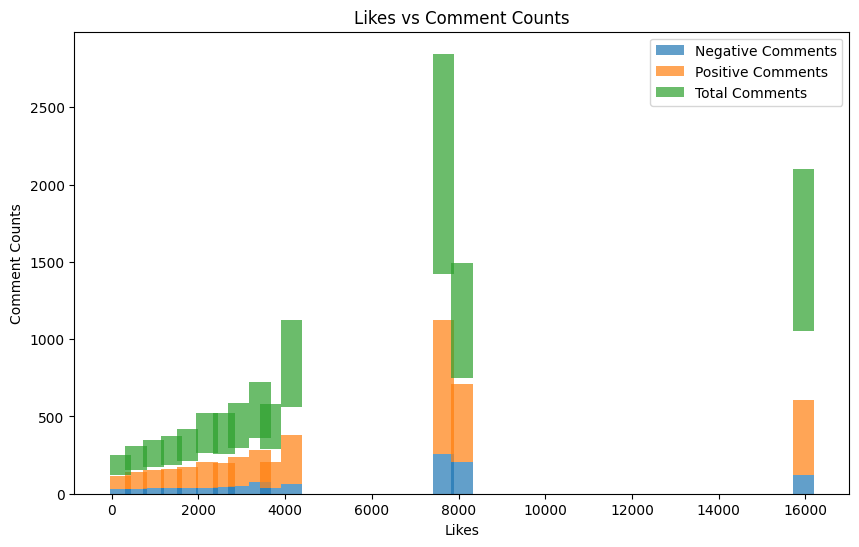

In [93]:
df_vk_with_counts['comments'] = df_vk_with_counts['negative_count'] + df_vk_with_counts['positive_count'] + df_vk_with_counts['neutral_count']

num_bins = 40
df_vk_with_counts['like_bins'] = pd.cut(df_vk_with_counts['likes'], bins=num_bins)

grouped_data = df_vk_with_counts.groupby('like_bins').mean()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['likes'], grouped_data['negative_count'], width=grouped_data['likes'].diff().max(), alpha=0.7, label='Negative Comments')
plt.bar(grouped_data['likes'], grouped_data['positive_count'], width=grouped_data['likes'].diff().max(), alpha=0.7, label='Positive Comments', bottom=grouped_data['negative_count'])
plt.bar(grouped_data['likes'], grouped_data['comments'], width=grouped_data['likes'].diff().max(), alpha=0.7, label='Total Comments', bottom=grouped_data['negative_count'] + grouped_data['positive_count'] + grouped_data['neutral_count'])


plt.xlabel('Likes')
plt.ylabel('Comment Counts')
plt.title('Likes vs Comment Counts')
plt.legend()

## Новости с большим количеством лайков просто получают больше комментариев, но от 4000 - кол-во негативных увеличивается.


__[0.2]__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаen, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [95]:
df_vk_with_counts =df_vk_with_counts.drop('like_bins',axis = 1)
df_vk_with_counts

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,tags_names,negative_count,positive_count,neutral_count
2203,23472597,https://vk.com/ria?w=app5748831_-15755094,2018-12-19 12:00:15,Рассылки от РИА Новости,14,8.0,"Друзья, подписывайтесь на наши рассылки: \n- утреннюю, чтобы с самого начала дня быть в курсе актуальных новостей; \n- вечернюю, чтобы не пропустить главные темы дня;\n- видео-рассылку, чтоб не пропускать самое интересное из разных уголков мира;\n- ""Внимание, конкурс!"", чтоб не пропускать розыгрыши крутых призов✌🏻",рассылки от риа новости,друзья подписывайтесь на наши рассылки утреннюю чтобы с самого начала дня быть в курсе актуальных новостей вечернюю чтобы не пропустить главные темы дня видеорассылку чтоб не пропускать самое интересное из разных уголков мира внимание конкурс чтоб не пропускать розыгрыши крутых призов,[],[],0.0,8.0,0.0
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причастных к серии терактов",15,47.0,NaN,в днр заявили о задержании диверсантов причастных к серии терактов,#UNK#,"[873, 905]","[украина, в мире]",10.0,35.0,2.0
1874,23542467,https://vk.com/ria?w=app5748831_-15755094,2018-12-25 11:53:26,"Новости, видео, конкурсы. Рассылка от РИА Новости",15,NaN,"Друзья, подписывайтесь на наши рассылки: \n- утреннюю, чтобы с самого начала дня быть в курсе актуальных новостей; \n- вечернюю, чтобы не пропустить главные темы дня; \n- видео-рассылку, чтоб не пропускать самое интересное из разных уголков мира; \n- ""Внимание, конкурс!"", чтоб не пропускать розыгрыши крутых призов✌🏻",новости видео конкурсы рассылка от риа новости,друзья подписывайтесь на наши рассылки утреннюю чтобы с самого начала дня быть в курсе актуальных новостей вечернюю чтобы не пропустить главные темы дня видеорассылку чтоб не пропускать самое интересное из разных уголков мира внимание конкурс чтоб не пропускать розыгрыши крутых призов,[],[],NaN,NaN,NaN
1819,23553084,/20181226/1548001199.html,2018-12-26 12:00:15,Найдите ингредиенты для салата как можно скорее,29,8.0,Создайте себе праздничное настроение — пройдите нашу новогоднюю игру! 😋,найдите ингредиенты для салата как можно скорее,создайте себе праздничное настроение пройдите нашу новогоднюю игру,[33],[россия],1.0,6.0,1.0
10070,21372167,https://realty.ria.ru/multimedia_infographics/20180622/1523135264.html,2018-06-25 09:16:16,Инфографика Ria.ru,30,26.0,Какие работы проводят в многоквартирных домах Москвы в рамках капремонта и как на него копить - смотрите в нашей инфографике.,инфографика riaru,какие работы проводят в многоквартирных домах москвы в рамках капремонта и как на него копить смотрите в нашей инфографике,"[33, 1298]","[россия, городское хозяйство москвы]",5.0,19.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,21251930,https://rsport.ria.ru/russia2018_news/20180614/1138002540.html,2018-06-14 16:58:12,Сборная России разгромила Саудовскую Аравию,3711,493.0,"Ура! Счет 5:0! Дублем отметился Денис Черышев, еще по мячу забили Юрий Газинский, Артем Дзюба и Александр Головин #ЧМ2018 🇷🇺🇷🇺🇷🇺",сборная россии разгромила саудовскую аравию,ура счет 50 дублем отметился денис черышев еще по мячу забили юрий газинский артем дзюба и александр головин чм2018,"[331, 394, 977]","[спорт, чемпионат мира по футболу 2018, футбол]",71.0,286.0,136.0
10267,21312534,https://rsport.ria.ru/russia2018_ourteam/20180619/1138257359.html?referrer_block=index_archive_2,2018-06-19 19:56:05,Сборная России обыграла Египет на ЧМ-2018,4151,562.0,Урааа! Сборная России выиграла у Египта со счетом 3:1! #ЧМ2018,сборная россии обыграла египет на чм2018,урааа сборная россии выиграла у египта со счетом 31 чм2018,"[331, 394, 977]","[спорт, чемпионат мира по футболу 2018, футбол]",66.0,313.0,183.0
5582,22590171,https://rsport.ria.ru/fights/20181007/1143458010.html,2018-10-07 05:05:00,Хабиб Нурмагомедов победил Конора Макгрегора и защитил титул чемпиона UFC,7652,1423.0,NaN,хабиб нурмагомедов победил конора макгрегора 

In [105]:
df_vk_with_counts['a'] = 1 + df_vk_with_counts['positive_count']
df_vk_with_counts['b'] = 1 + df_vk_with_counts['negative_count'] + df_vk_with_counts['neutral_count']

df_vk_with_counts['result'] = (df_vk_with_counts['a'] / (df_vk_with_counts['a'] + df_vk_with_counts['b'])) - 1.65 * np.sqrt(
    (df_vk_with_counts['a'] * df_vk_with_counts['b']) / ((df_vk_with_counts['a'] + df_vk_with_counts['b']) ** 2 * (df_vk_with_counts['a'] + df_vk_with_counts['b'] + 1))
)
df_vk_with_counts = df_vk_with_counts.drop(['a','b'],axis = 1)
df_vk_with_counts.sort_values(by='result', ascending=False).head(50)

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,tags_names,negative_count,positive_count,neutral_count,result,tag_positivity
4752,22847411,/science/20181025/1531496458.html,2018-10-25 18:27:20,Под Каиром нашли зал торжеств фараона Рамзеса II,361,44.0,NaN,под каиром нашли зал торжеств фараона рамзеса ii,#UNK#,[],[],1.0,43.0,0.0,0.907440,0.020624
4444,22931980,/science/20181101/1531982688.html,2018-11-01 22:27:51,"НАСА возобновит совместные с ""Роскосмосом"" пилотируемые старты",96,56.0,NaN,наса возобновит совместные с роскосмосом пилотируемые старты,#UNK#,[178],[сша],1.0,54.0,1.0,0.900702,0.016084
15718,19436158,/science/20180130/1513642882.html,2018-01-30 20:53:53,Палеонтологи нашли в Египте останки ранее неизвестного науке динозавра,219,51.0,NaN,палеонтологи нашли в египте останки ранее неизвестного науке динозавра,#UNK#,[],[],1.0,49.0,1.0,0.891509,0.017481
9985,21399230,/society/20180627/1523502124.html,2018-06-27 13:30:47,На Кавказе в Центре восстановления леопарда родились пять котят,523,21.0,NaN,на кавказе в центре восстановления леопарда родились пять котят,#UNK#,"[1434, 1473]","[экология, экология в россии]",0.0,21.0,0.0,0.887837,0.042278
13504,20233566,/science/20180328/1517477930.html,2018-03-28 23:00:23,"Астрономы открыли ""невозможную"" галактику, где нет темной материи",373,141.0,NaN,астрономы открыли невозможную галактику где нет темной материи,#UNK#,[178],[сша],5.0,131.0,5.0,0.886437,0.006287
10213,21329261,https://m.vk.com/@-15755094-polzovatel-twitter-predskazal-ishod-matchei-chm-s-uchastiem,2018-06-21 11:46:51,Пользователь Twitter предсказал исход матчей ЧМ с участием России,233,19.0,#ЧМ2018 #Ф2018,пользователь twitter предсказал исход матчей чм с участием россии,чм2018 ф2018,"[331, 394, 977]","[спорт, чемпионат мира по футболу 2018, футбол]",0.0,19.0,0.0,0.877466,0.046182
10215,21328552,/science/20180621/1523124739.html,2018-06-21 10:18:37,NASA показало голубые дюны на Марсе,365,88.0,NaN,nasa показало голубые дюны на марсе,#UNK#,[178],[сша],2.0,82.0,4.0,0.875898,0.009953
3538,23141871,/science/20181121/1533220876.html,2018-11-21 19:27:02,Астрономы предупредили об угрозе мощного взрыва в Млечном Пути,131,77.0,NaN,астрономы предупредили об угрозе мощного взрыва в млечном пути,#UNK#,[178],[сша],2.0,72.0,3.0,0.875180,0.011366
4574,22894953,/technology/20181029/1531659835.html,2018-10-29 21:50:04,В документах Word нашли опасную уязвимость,87,18.0,NaN,в документах word нашли опасную уязвимость,#UNK#,[178],[сша],0.0,18.0,0.0,0.871527,0.048418
696,23827375,/20190118/1549584108.html,2019-01-18 20:30:30,"В Нидерландах нашли картину, которая может принадлежать кисти Ван Гога",128,18.0,NaN,в нидерландах нашли картину которая может принадлежать кисти ван гога,#UNK#,[],[],0.0,18.0,0.0,0.871527,0.048418


Построили? Срочно пришлите свою любимую позитивную  новость в общий чат!!!

Топ негативных новостей строить не будем. Вокруг итак слишком много негатива 😻😻😻

__[0.2]__ Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

__Ответ:__

In [115]:
def calculate_tag_positivity(tags, positive_count, negative_count, neutral_count):
    a = 1 + positive_count
    b = 1 + negative_count + neutral_count
    result = (a / (a + b)) - 1.65 * np.sqrt((a * b) / ((a + b) ** 2 * (a + b + 1)))
    return result

df_vk_with_counts['tag_positivity'] = df_vk_with_counts.apply(lambda row: calculate_tag_positivity(row['tags_names'], row['positive_count'], row['negative_count'], row['neutral_count']), axis=1)
df_tags_expanded = df_vk_with_counts.explode('tags_names')

avg_tag_positivity = df_tags_expanded.groupby('tags_names')['tag_positivity'].mean().reset_index().sort_values(by='tag_positivity', ascending=False)
avg_tag_positivity.head(20)


,tags_names,tag_positivity
280,одесса,0.750589
434,"учения ""восток-2018""",0.742336
270,новости агентства,0.742069
359,северная осетия,0.741079
405,стихийное бедствие в японии,0.733105
281,олег кожемяко,0.727386
56,варфоломей i (патриарх константинопольский),0.724800
67,владимир колокольцев,0.722897
222,македония,0.722526
191,коммерческая недвижимость - новости,0.720704


__[0.2 бонусных]__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [ ]:
# your code here
# ヾ(๑╹◡╹)ﾉ